## Interpretation in Logit and Probit Models and Introduction to Ordinal Models
### Weber, POL 683

## Interpretation

The concerns with logit and probit models is that they are not directly interpretable, due to the non-linearity of the effect of $x$ on $y$. Consistent with Long (1997), if we take the partial derivatives with respect to $x$ (Use the chain rule and then ${{\partial F(x)} \over {\partial x}}=f(x)$:

$${{\partial F(x)}\over{\partial x}}=b \times f(x)$$ 

In this case, f(x) is either the logit or probit PDF. So, for logit, 

$${{\partial F_{logit}(x)}\over{\partial x}}=b \times {{exp(a+bx)}\over{1+exp(a+bx)^2}}$$

$${{\partial F_{logit}(x)}\over{\partial x}}=b \times {{exp(a+bx+cz)}\over{1+exp(a+bx+cz)^2}}$$


The slope associated with $x$ is a function of $b$ and the given value of $x$. For probit, just replace f(x) with the normal PDF.

It is even more challenging to interpret the results when there are other covariates, since:

$${{\partial F_{logit}(x)}\over{\partial x_k}}=b_k \times {{exp(a+\sum b_j x_j)}\over{1+exp(a+\sum b_j x_j)^2}}$$

We could attempt to interpret the coefficients in terms of the partial derivative for the latent variable, though recall why this is ill-advised: The coefficients depend on the scale of the error term. Depending upon the variance of the error (normal or logit), this effects the coefficient. Thus, it is quite difficult to make much sense from the slopes alone.

As noted by Long (1997), we could partially standardized the slopes, by dividing each slope by the standard deviation of $y$, ($b/s_y)$. Now the interpretation is, "for a one unit change in x we anticipate a b standard deviation change in $y_{latent}$." We could alternatively fully standardize the slopes by multiplying $b$ with $(s_x/s_y)$. Now, we may state "for a one standard deviation change in x we anticipate a b standard deviation change in $y_{latent}$." These approaches are somewhat more common, but it's still far from ideal. What does $y_{latent}$ mean, in practice? 

It's not very intuitive. To see this, let's just consider the logit model, though really the same problem exists for the probit.

Recall the logit model is:

$${log{{\theta_i}\over{1-\theta_i}}}=x_iB$$

The model estimates the linear effect of $x_i$ on the log odds ratio. Thus, every coefficient in the model represents the expected log change in the odds for a unit change in $x$. Unlike an OLS model, the coefficients in the logit (or probit) are not directly interpretable. If you are absolutely certain that a reader thinks of the world in terms of log odds ratios, then just leave the model as is. Or, perhaps readers think in terms of standardized log odds ratios? If not, you it's necessary to do a fair amount of post-estimation work to show the consequences of your independent variables on you 0/1 outcome. 

The problem more or less boils down to something relatively simple: The model is non-additive and non-linear. The consequences of x on the probability that $y=1$ is inherently tied to the value of x and the value of all other covariates in the particular model. The "non-additivity" part is unimportant here, since there is only one indepenendent variable. But, we can still see that the slope of x$\rightarrow$y is far from constant.

## Non constant effects

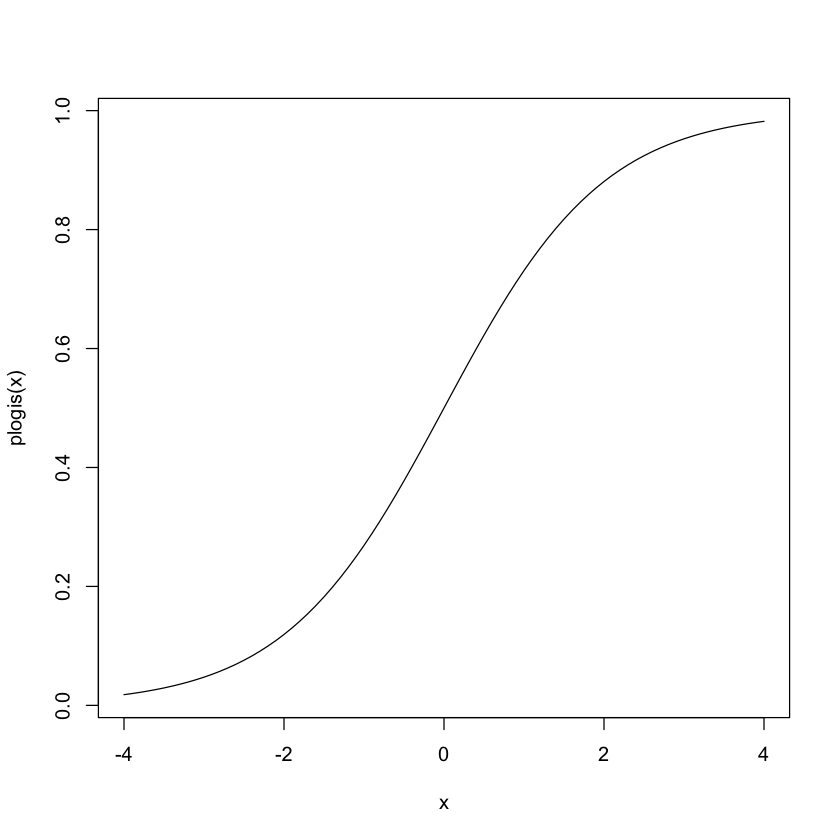

In [5]:
x<-seq(-4,4, by=.1)
plot(x, plogis(x), type="l")


In [8]:
library(dplyr)
library(survey)  
library(mice) 
library(reshape2)
rm(list=ls())
load("~/Desktop/demo683.rda")
ls()
head(demo_data)

[1] "demo_data"

trump_vote,pid,dem_ideo,rep_ideo
0,1,3,2
1,4,4,2
1,6,3,3
0,2,3,2
1,4,3,2
1,6,5,5


[1] "demo_data"

trump_vote,pid,dem_ideo,rep_ideo
0,1,3,2
1,4,4,2
1,6,3,3
0,2,3,2
1,4,3,2
1,6,5,5


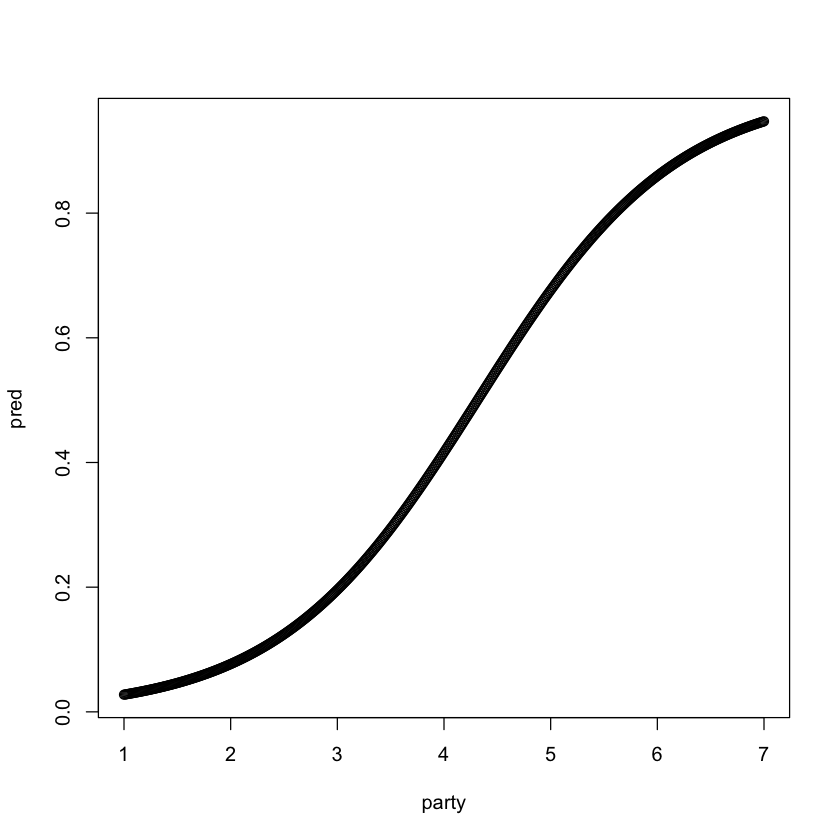

In [10]:
library(dplyr)
library(survey)  
library(mice) 
library(reshape2)
rm(list=ls())
load("~/Desktop/demo683.rda")
ls()
head(demo_data)
model<-glm(trump_vote~pid, data=demo_data, family=binomial("logit"))
pred<-coef(model) %*% t(cbind(1, seq(1,7, by=0.01)) ) %>% plogis()

party<-seq(1,7, by=0.01)
plot(party, pred)

## Nonlinear effects

In [7]:

head(demo_data)
demo_data$lib_dems<-ifelse(demo_data$dem_ideo>2, 1, 0) ## Perception that Dems are too liberal!
model<-glm(trump_vote~pid+lib_dems, data=demo_data, family=binomial("logit"))
model

pred1<-coef(model) %*% t(cbind(1, seq(1,7, by=0.01),0)) %>% plogis()
pred2<-coef(model) %*% t(cbind(1, seq(1,7, by=0.01),1)) %>% plogis()
summary(model)

party<-seq(1,7, by=0.01)

plot(party, pred2, main="Red=Not Liberal/Blue=Liberal", ylim=c(0,1), col="red")
lines(party, pred1, main="Red=Not Liberal/Blue=Liberal", col="blue")


ERROR: Error in head(demo_data): object 'demo_data' not found


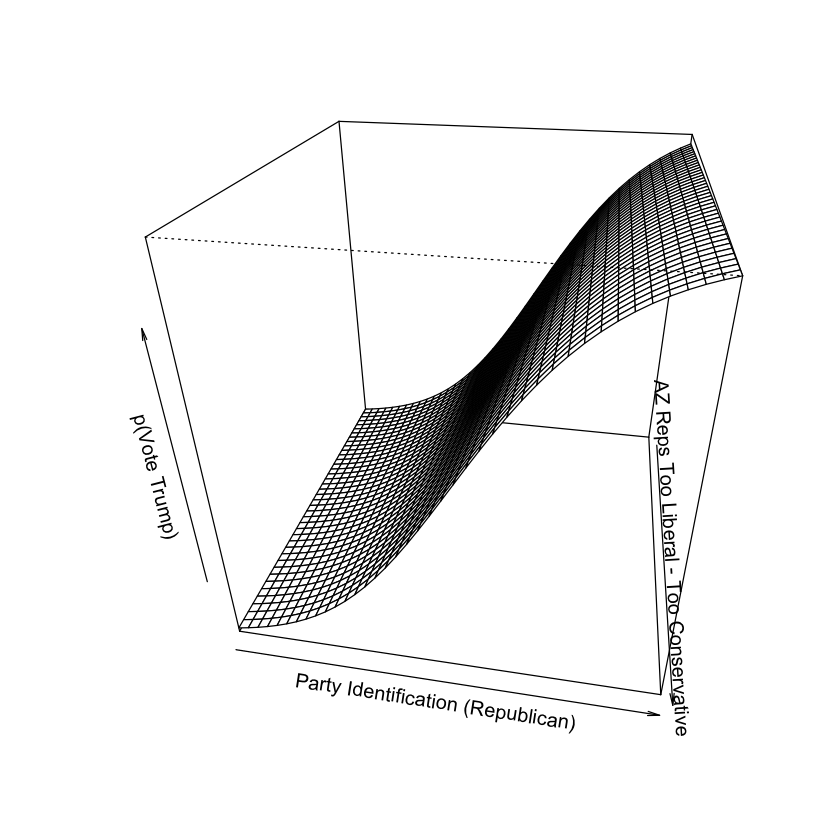

In [10]:
library(akima)
model<-glm(trump_vote~pid+rep_ideo, data=demo_data, family=binomial("logit"))
covariates<-expand.grid(pid=seq(1,7, by=0.1),rep_ideo=seq(1,5, by=0.1))
y<-predict(model, covariates) %>% plogis()
d<-interp(covariates[,2], covariates[,1], y)
persp(d, xlab="AZ Reps Too Liberal - Too Conservative", 
      ylab="Party Identification (Republican)", 
      zlab="p(Vote Trump)", theta=100, phi=30)




The relationship is monotonic for both party identification and party perceptions, but the shape of the curve is largely dependent on values for both variables. The three-dimensional display shows the entire probability surface. 3D plots are interesting, but I tend to agree with Gelman and Hill (2007) that these plots are a bit difficult to interpret. Instead, it is generally easier to plot the predictions across levels of the primary covariate -- here, pid -- while holding the remaining values at some value. A good candidate is the mean (for continuous) and the mode (for categorical) covariates. Thus, we could plot the effect of pid at mean levels of perceptions.


### Uncertainty

We have only discussed the point estimates of a logit/probit model. But, we also need to discuss the variances of the estimates, in order to derive standard errors and test-statistics. Typically, when we use maximum likelihood, we can use the matrix of second derivatives to calculate the variance of a parameter.

First, let's define the Hessian as the matrix of second derivatives for our parameters. Consistent with Long (1997, p.32)

$$H(\theta)={{\partial^2 ln L(\theta) }\over{\partial \theta \partial \theta^T}}$$

What does the second derivative tell us? If the first derivative is the instataneous effect of $x$ on $y$, the second derivative is the rate of change For instance, we previously used it to determine whether a function is concave (upside down u) or convex (u) shaped. If a function is concave, and we find the global maximum, the first derivative will be 0 and the second derivative will be negative. If it's convex, it will be positive.

The negative of the expected value of the Hessian is the information matrix, 

$$I(\theta)=-E(H(\theta))$$.

Finally, the inverse of the information matrix is the variance-covariance matrix for the parameters.

$$V(\theta)=[-E(H(\theta))]^{-1}$$.

We can display the estimated variance matrix by using the $\texttt{vcov}$ statement.

If we simulate from a multivariate normal, this of course is useful to estimate standard errors, but we could also use this matrix to display prediction uncertainty for our slopes. This is essentially what $\texttt{Clarify}$ does in $\texttt{Stata}$ (King, Tomz and Wittenberg 2000). For our example, let's draw values of racial resentment from a standard multivariate normal distribution, with means corresponding to the regression estimates and variances derived from $\Sigma$, the afformentioned variance-covariance matrix.

Note how the 95\% confidence interval -- which you would need to calculate -- is roughly equal to the 2.5 and 97.5 percentiles from my simulations. If we want to display the slope across these values, with the error in the slope, then:

The strategy is the same for more complicated models. We are simulating draws from a multivariate normal based on the coefficients from the model and the variance-covariance estimates from the model. If we conduct these simulations 1000 times, we will get 1000 slope estimates. They of course should look roughly normal. We can then use the characteristics of this distribution of parameter estimates to make inferences about a population. For instance, here is the distribution of slopes: 

### Marginal Effects

It can often be useful to calculate the marginal effect of a variable -- i.e., the change in probabilities for a one unit increase in the variable. Given how I've coded my data, a "one-unit" change corresponds to the following:

(1) Calculate the probability that $y=1$ when $x=0$.

(2) Calculate the probability that $y=1$ when $x=1$.

(3) Subtract (1) from (2)

We could simulate a confidence interval as well, by modifiying these instructions.

(1) Calculate the probability that $y=1$ when $x=0$ by drawing $K$ draws from the multivariate normal of the model, with mean values corresponding to the slopes and the variance covariance matrix of the model parameters.

(2) Calculate the probability that $y=1$ when $x=1$ by drawing $K$ draws from the multivariate normal of the model, with mean values corresponding to the slopes and the variance covariance matrix of the model parameters

(3) Subtract (1) from (2), which will now yield a distribution.

Let's estimate the "simple" model and then write a simple function to do this.


The marginal effect of authoritarianism is 0.69, with a 95\% CI of 0.64 to 0.74. Incidentally, the linear model, for all it's problems, is also fairly good at identifying the marginal effect.



Finally, the package $\texttt{mfx}$ has a function called $\texttt{logitmfx}$ to interpret marginal effects, though I don't find it as flexible as modifications to the function above. 



In [11]:
library(MASS)
library(dplyr)

margins.example<-function(output){
  dat<-model.matrix(model)[,2]
  require(MASS)
  ma<-cbind(
    1,
    7
)
  mi<-cbind(
    1,
    1
  )
  beta.sim<-mvrnorm(1000, coef(output), vcov(output)) ##Draw samples from multivariate distrbution
    ###Generate the Predictions###
    low<-beta.sim %*% t(as.matrix(mi)) %>% plogis()
    high<-beta.sim %*% t(as.matrix(ma)) %>% plogis()
    margin=high-low
    return(list(low=data.frame(min.2.5=quantile(low, 0.025),
                                          min.25=quantile(low, 0.25),
                                          max.75=quantile(low, 0.75),
                                          max.97.5=quantile(low, 0.975),
                                          mean.score=quantile(low, 0.5)),
                    high=data.frame(min.2.5=quantile(high, 0.025),
                                          min.25=quantile(high, 0.25),
                                          max.75=quantile(high, 0.75),
                                          max.97.5=quantile(high, 0.975),
                                          mean.score=quantile(high, 0.5)),
                    margin=data.frame(min.2.5=quantile(margin, 0.025),
                                          min.25=quantile(margin, 0.25),
                                          max.75=quantile(margin, 0.75),
                                          max.97.5=quantile(margin, 0.975),
                                          mean.score=quantile(margin, 0.5))
    ))
    
}
margins.example(model)




,min.2.5,min.25,max.75,max.97.5,mean.score
2.5%,0.01815647,0.02434524,0.031694,0.04040313,0.02769297
,min.2.5,min.25,max.75,max.97.5,mean.score
2.5%,0.9279376,0.941454,0.9530698,0.9629736,0.947253
,min.2.5,min.25,max.75,max.97.5,mean.score
2.5%,0.8899949,0.9105207,0.9280759,0.9430313,0.9189119


This is interesting -- and important: The probability of voting for Trump if one is a strong Democrat is 0.04 with a CI of 0.02 to 0.04 (I also present the 50% CI for comparison). Notice the effects for Republicans.  I subtract the two distributions, **and only then** estimate the marginal effect. The discrete marginal effect of moving from Strong Democrat to Strong Republican leads to a 92% increase in the probability of voting for Trump, with a 0.88 to 0.94. This is a relatively clear indicator of just how potent PID is within American politics

### Summary for Logit/Probit 

Model predictions are important because of the inherent difficulties in directly intepreting logit and probit results. If you use these models, it is your responsibility to walk the reader through the substantive importance. We don't just use a logit or probit because binary DVs are a nuisance; rather, these are a rich class of models that allow one to estimate complex effects, with relatively simple statistical models. The non-additivity and non-linearity of these models mean that it is the researcher's responsibility to adequately capture this richness.

Model fit is an important, though difficult, topic when we are dealing with non-linear models. Though we can derive scalar measures of model fit from the linear model, which generally describe the discrepancy between the observed and predicted data (e.g., $R^2$), it's hard to find a comparably reliable statistic for non-linear models. 

Typically, we use $R^2$ to diagnose model fit, where the statistic is between 0 and 1. But with dichotomous data, it is never really clear what the boundary will be. It also doesn't have a natural intepretation. Recall, the statistic measures the amount of variance shared between the linear composition and the dependent variable -- it's the ratio of the regression variance to the total variance. We can calculate the total variance, but the regression variance is more challenging because we never observe $y_{latent}$ directly.

Because we need to theoretically separate the structural and measurement models, it is difficult to derive a measure that is based on the distance between the observed and the predicted data. For instance, $exp(b)$, the odds ratio in a logit regression, makes it difficult to then map the log odds onto the 0/1 realization of the latent variable. 

Be very careful when considering particiular models of fit -- e.g., scalar models -- since these also may not attest to the complexity in your data/model.


## Ordinal Models

Let's transition now to the scenario in which we have an ordinal dependent variable. Unlike a continuous dependent variable, the distances between categories may be unequal. Although a question such as "How much do you agree or disagree with the following item" scored on a five point scale can be logically ordered, the intervals between categories are not equal. Can we assume that the numerical distance between strongly disagree to disagree is equal to disagree to slightly disagree?

If we have ordered, non-interval level data, we again will violate the assumptions of the classical linear regression model. First, we have non-constant variance. Second, predictions may be non-sensical (i.e., we predict things outside of the observed bounds). Third, if the category distances are theoretically quite different, the OLS model and the more appropriate ordinal probit or logit will diverge (for short, let's call it the ordered regression model, ORM). 

That said, there may be circumstances under which the models agree (though I would default to logit or probit). For instance, if the category distances are in fact equal then OLS and the ORM will agree. Second, if there are many categories, not much sparsity, and a relatively normal looking distribution of responses, the OLS and OLR will agree. 

However, at this point there is no reason not to use the ORM. As we'll see, it's merely another application of ML and in many ways is an extension of the probit or logit model. With this in mind, I'll present many of the proofs and concepts using the logisitic model (hence the OLR). The ordered probit model (OPR) is nearly equivalent. Again, it's just based on the distribution of the errors -- normal or logit. The error PDFs and CDFs are again the same, and follow the formula from previous chapters. Using ordered logit or probit is often a matter of personal preference; theoretically, they only involve assumptions about the errors. I find the OLR easier to interpret, as we can think of the latent variable in terms of "odds ratios." For this reason, the ordered logit model is sometimes called the "proportional odds regression" because of its odds ratio interpretation. 

## Intuition
We should only use an ordered parameterization when we have ordered data. Some data can be ordered, even if they are theoretically multidimensional. An example is party identification in the United States. This is often placed on a continuum, where Independents reside in the middle. Why is it justified to treat PID as ordinal?

Occasionally, ordering is less justifiable. Here, an example is ideology. Many scholars have shown that it's multidimensional, consisting of a social and economic dimension. Thus, someone may identify as conservative, while justifying their belief in a way that is unique relative to another conservative.

Sometimes ordering is theoretically justifiable, but in practice it makes little sense. That is, the application of the object is not ordered. Here, a good example is color. Yes, we can order colors on a spectrum. But, if we had data on the color of cars purchased from a local dealership, it would be silly to order these options in terms of color according to this spectrum (Long 1997, p 115). 

In short, the order should be theoretically and practically justifiable. If it is not, do not use an ordinal regression model.

## The latent variable approach

Much of this is simply a summarization of Long (1997), Chapter 5. The formula I present below the same, and I simply describe the model in a slightly different manner. Assume $y_{latent}$ is an unobserved variable which is mapped onto the probability of $y_{obs} \in (1,2,3,...k)$. Instead of the variable being 0/1, it is not more than two categories that are ordered. For exposition, let's briefly just assume we know $y_{latent}$ and want to map that to observing a particular category.

Using the same logic from the binary regression model, assume that we observe the category based on its orientation to a series of cutpoints, where

$$y_i=m: \tau_{k-1}\leq y_{latent} < \tau_{k}$$

The $\tau$ parameters represent a series of thresholds that map the latent variable onto the categorical variable. Again, it's  a \emph{measurement model} (Long 1997, 123)

$$y_{obs} = 
  \begin{array}{lr}
    A, \tau_0=-\infty \leq y_{latent}<\tau_1\\
    B, \tau_1\leq y_{latent}<\tau_2\\
    C, \tau_2\leq y_{latent}<\tau_3\\
    D, \tau_3\leq y_{latent}<\tau_4\\
    E, \tau_4\leq y_{latent}<\tau_5=1-\tau_4
  \end{array}
$$

Setting aside the structural model we have projected $y_{latent}$ onto $y_{obs}$ through a series of cutpoints. The $structural model is

$$y_{latent}=Xb+e$$

Where each row vector of X is a 1 (for the intercept) and any $j$ predictors. So, again, though we do not observe
$y_{latent}$, we assume it is mapped onto what we do observe -- a series of ordered categories -- depending on a series of cutpoints. Then,

\begin{eqnarray*}
pr(y_{i}=1|X_i) & = & pr(\tau_0 \leq y_{i,latent}<\tau_1)|X_i) \\
             & = &  pr(\tau_0 \leq X_i b+e_i<\tau_1)|X_i) \\
             & = &  pr(\tau_0 - X_ib \leq e_i<\tau_1-X_ib)|X_i) \\
             & = &  pr(\tau_1-X_ib)|X_i)-pr(\tau_0 - X_ib|X_i) \\
             & = &  F(\tau_1-X_ib)-F(\tau_0 - X_ib) \\
\end{eqnarray*}

Which is easily extended to each of the $k$ categories by changing the index. If F denotes the CDF, then for the ordered probit:

\begin{eqnarray*}
pr(y_{i}=k|X_i) & = &\Phi(\tau_1-\alpha-\beta X) \\
             & = &  \Phi(\tau_2-\alpha-\beta X)-\Phi(\tau_1-\alpha-\beta X) \\
             & = &  \Phi(\tau_3-\alpha-\beta X)-\Phi(\tau_2-\alpha-\beta X)\\
             & = &  1-\Phi(\tau_3-\alpha-\beta X)\\
\end{eqnarray*}
The last row is simplified because the probability of the CDF evaluated from $-\infty$ to $\infty$ is 1, so the first term becomes 1. Any CDF is plausible, such as the logit, in which case we have,
\begin{eqnarray*}
pr(y_{i}=k|X_i) & = &Logit(\tau_1-\alpha-\beta X) \\
                & = &  Logit(\tau_2-\alpha-\beta X)-Logit(\tau_1-\alpha-\beta X) \\
                & = &  Logit(\tau_3-\alpha-\beta X)-Logit(\tau_2-\alpha-\beta X)\\
             & = &  1-Logit(\tau_3-\alpha-\beta X)\\
\end{eqnarray*}

I'll often use $F$ generically to mean the CDF; and $f$ will denote the PDF. In practice, for the kind of models we'll discuss, substitute $F$ and $f$ for the normal or logit densities. 

Graphically, we might think of the model as an effect of the independent variable on the latent variable and the latent variable mapped onto the observed variable through a series of cutpoints. Of course, in the graphical model we need to apply constraints to the error variance and we can only estimate $k-1$ thresholds and an intercept or $k$ thresholds and no intercept term.



### The Likelihood

Recall, that the probability of being in the $k$th category for the $i$th subject is,

\begin{eqnarray*}
pr(y_{i}=k|X_i) & = & F(\tau_k-\alpha-X_i\beta)-F(\tau_{k-1}-\alpha-X_i\beta) \\
\end{eqnarray*}

Thus, for each subject we need to calculate the joint parameter space, $pr(y_{i}=1|X_i)\times pr(y_{i}=2|X_i) \times pr(y_{i}=3|X_i) \times....pr(y_{i}=K|X_i)$. This is just the joint probability for category membership, for each subject, so

\begin{eqnarray*}
pr(y_{i}|X_i) & = & \prod_{k=1}^K F(\tau_k-\alpha-X_i\beta)-F(\tau_{k-1}-\alpha-X_i\beta) \\
\end{eqnarray*}

This only refers to the probability space for a single subject. Since the likelihood is $\prod_{i=1}^N p_i$, we need to calculate the joint probability for each subject, which is,

\begin{eqnarray*}
pr(y|X) & = & \prod_{i=1}^N \prod_{k=1}^K F(\tau_k-\alpha-X_i\beta)-F(\tau_{k-1}-\alpha-X_i\beta) \\
L(\beta \tau | y, X)& = & \prod_{i=1}^N \prod_{k=1}^K F(\tau_k-\alpha-X_i\beta)-F(\tau_{k-1}-\alpha-X_i\beta) \\
\end{eqnarray*}

Once again, it's far easier to calculate the probabilities by taking the log of the likelihood.

\begin{eqnarray*}
Loglik(\beta \tau | y, X)& = & \sum_{i=1}^N \sum_{k=1}^K log[F(\tau_k-\alpha-X_i\beta)-F(\tau_{k-1}-\alpha-X_i\beta)] \\
\end{eqnarray*}

1) Calculating the probability of residing in each of the k categories, for each unit.
2) Take the product (joint probability) across the k categories.
3) take the product from (2) across units.

Notice now that each $\tau$ represents the likelihood of being in all categories through $k$. Thus, $\tau_1$ represents the likelihood of category 1,$\tau_2$ represents categories 1 and 2, and so forth. They represent the cumulative likelihood of each category membership. They are cumulative logits (or probits). This is why we the differences then allow us to calculate the likelihood of particular category membership. 

Consider the ordered logit,

$$log{{{pr(y\leq k|x)}\over{pr(y > k |x)}}}=log{{{pr(y\leq k|x)}\over{pr(y > k |x)}}}=\tau_k- X \beta$$


This is important for intepretation. 

$${{{pr(y\leq k|x)}\over{pr(y > k |x)}}}=exp(\tau_k- X \beta)$$

Which accompanies the interpretation of the odds as the $pr(y\leq k|x)$ to  $pr(y > k|x)$. Interpreting the output in terms of the exponentiated log odds can make a lot of sense, but it is dependent upon the nature of your variable.

For instance, say we are predicting the log odds from 1 through the $k$th category membership, relative to all higher categories. Our dependent variable coded "Strongly Agree," "Agree," "Disagree," and "Strongly Disagree." If we use the linear prediction and the first threshold, that represents the log odds of being in the "Strongly Agree" category, relative to all other categories. If we use the linear prediction and the second threshold, that represents the log odds of being in the "Strongly Agree," and "Disagree" category, relative to the "Disagree" and "Strongly Disagree" categories.

If we estimate a simple model. Another strong assumption is lurking in this model, is that is  the odds of being in each category given the independent variable is constant. This is the reason why the ordered logit is called the "proportional odds model."

Let's assume a simple case,

\begin{eqnarray*}
y& \sim & ordered\_ logit(\alpha+\beta_1 x, \tau) \\
\end{eqnarray*}

Let's just say that $\tau$ is a vector of length 3. So, how many categories do we observe for $y$?

What this means is that, the $\tau_1$ represents the log-odds of being in category 1 (versus 2 through 4). Write the cumulative probabilities as,

\begin{eqnarray*}
pr(y\leq 1|x)=F(\tau_1-\alpha-\beta x)
\end{eqnarray*}

Then $\tau_2$ represents the log-odds of being in category 1 or 2 (versus 3 and 4). 

\begin{eqnarray*}
pr(y\leq 2|x)=F(\tau_2-\alpha-\beta x)
\end{eqnarray*}

More generally,

\begin{eqnarray*}
pr(y\leq k|x)=F(\tau_k-\alpha-\beta x)
\end{eqnarray*}

If we plot the prediction that $y<1, y<2$ and so forth, we should observe that the lines are parallel. You can prove this to yourself by noting that the partial derivatives are the same,

\begin{eqnarray*}
{{\partial pr(y \leq 1|x)}\over{\partial x}}={{\partial pr(y \leq 2|x)}\over{\partial x}}={{\partial pr(y \leq 3|x)}\over{\partial x}}={{\partial pr(y \leq 4|x)}\over{\partial x}}
\end{eqnarray*}

The model is assuming that the regression lines are parallel, hence the **parallel lines assumption.** We can test for the feasibility of this model by estimating a series of parallel regression models. Let's estimate three binary logit regression. In the first model, we coded the dependent variable 1 if the response is "Strongly Agree" 0 if it is any of the other categories. In the second model we code the response 1 if the response is "Strongly Agree" or "Agree" and 0 if in the other categories. Then in the third model code it 1 if "Strongly Agree," "Agree," or "Disagree," and 0 if "Strongly Disagree." Now you have three versions of the dependent variable. Estimate three logistic regressions, one for each dependent variable.

4 category variable: Strongly Agree - Strongly Disagree
1) Recoding data: 1(SA), 0(otherwise) - esttimate a logit model, b
2) Recoding data: 1(SA A); 0(otherwise) - estimate a logit model, b
3) Recode data: 1(SA, A, D), 0(otherwise) - estimate a logit model, b are the same



The parallel lines assumption underlying the model is that the slopes are equivalent and all that moves the regression line is the threshold. Thus, we can test,

$$\beta_1=\beta_2=\beta_3$$

This is a test of whether the regression lines are parallel. It is a test of $X$ on $Y$ with $K-1$ separate logit equations (here 3 equations).

We can test the aformentioned constraints in the ordered logit by relaxing the assumption that the $\beta$ parameters are the same in the model. For instance, we could conduct a likelihood ratio test by comparing the model fit of the fully constrained model (the normal ordered logit) to one with freeing this constraint and estimating the three unique parameters for $\beta$. 

The LR test statistic is distributed $\chi^2$ with $J(K-2)$ degrees of freedom, where $K$ corresponds to the number of categories and $J$ is the number of independent variables. In this case, we have $1\times 2=2$ degrees of freedom. Why is it 2?

An alternative is the Wald test, which operates by again considering $K-1$ logits, and specifying a constraint matrix. Long (1997, 143-144) describes the derivation of the test, which follows from the Wald test we discussed in the previous lecture. This was introduced by Brant (1990) and is occasionally called the Brant test of the parallel lines/proportional odds/parallel logit assumption. 

## An Example




In [3]:
library(pscl)
head(demo_data)
polr(as.factor(dem_ideo)~1, demo_data) %>% summary()


Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


ERROR: Error in head(demo_data): object 'demo_data' not found


Imagine a latent (logistic) distribution that represents people's underlying believe about AZ Democrats (again people are asked to rate AZ Democrats relative to the national party, from "More Liberal" to "More Conservative." An individual's response is cumulative. The first cut point, between categories 1 and 2 is -1.883. Let's generate some probabilities.

In [4]:
library(ggfortify)
ggdistribution(dlogis, seq(-7, 7, 0.1))+
geom_vline(xintercept=-1.8683, col="black")+
geom_vline(xintercept=-0.8484, col="purple")+
geom_vline(xintercept=1.4863, col="red")+
geom_vline(xintercept=3.4855, col="pink")

ggdistribution(plogis, seq(-7, 7, 0.1))+
geom_vline(xintercept=-1.8683, col="black")+
geom_vline(xintercept=-0.8484, col="purple")+
geom_vline(xintercept=1.4863, col="red")+
geom_vline(xintercept=3.4855, col="pink")






ERROR: Error in library(ggfortify): there is no package called ‘ggfortify’


The model is again written as log odds (again, the "logit"), though this time according to the cumulative logits.

$${{pr(y\leq k|x)}\over{pr(y > k|x)}}=exp(\tau_k-X\beta)$$

Our example is easier, because there are no IVs. To predict the probability of category 1


In [154]:
polr(as.factor(dem_ideo)~1, demo_data)
print("Probability cat 1")
plogis(-1.8682541)
print("Probability cat 1 or 2")
plogis(-0.8484179 )
print("Probability cat 1 or 2 or 3")
plogis(1.4863009)
print("Probability cat 1 or 2 or 3 or 4")
plogis(3.4855074)
print("Probability 1,2,3,4,5")
1

Call:
polr(formula = as.factor(dem_ideo) ~ 1, data = demo_data)

No coefficients

Intercepts:
       1|2        2|3        3|4        4|5 
-1.8682541 -0.8484179  1.4863009  3.4855074 

Residual Deviance: 2978.874 
AIC: 2986.874 

[1] "Probability cat 1"


[1] 0.1337439

[1] "Probability cat 1 or 2"


[1] 0.2997648

[1] "Probability cat 1 or 2 or 3"


[1] 0.8155224

[1] "Probability cat 1 or 2 or 3 or 4"


[1] 0.9702726

[1] "Probability 1,2,3,4,5"


[1] 1

But this is of limited value, since it's cumulative. We want the probability of **each category**

In [155]:
print("Probability cat 1")
plogis(-1.8682541)
print("Probability cat 2")
plogis(-0.8484179 )-plogis(-1.8682541)
print("Probability cat 1 or 2 or 3")
plogis(1.4863009)-plogis(-0.8484179 )
print("Probability cat 1 or 2 or 3 or 4")
plogis(3.4855074)-plogis(1.4863009)
print("Probability 1,2,3,4,5")
1-plogis(3.4855074)

[1] "Probability cat 1"


[1] 0.1337439

[1] "Probability cat 2"


[1] 0.166021

[1] "Probability cat 1 or 2 or 3"


[1] 0.5157576

[1] "Probability cat 1 or 2 or 3 or 4"


[1] 0.1547502

[1] "Probability 1,2,3,4,5"


[1] 0.02972741

Notice what the "thresholds" mean in this context, the represent the cumulative probabilities of choosing a response for an ordinal variable. 13% believe that AZ Democrats are more liberal than the national party; 16% believe AZ Dems are somewhat more liberal. 52% believe AZ Democrats are aligned with the national party. 15% believe AZ Dems are more conservative, 3% believe they are much more conservative.

### Some More

In [55]:
model=polr(as.factor(dem_ideo)~pid, demo_data)
model %>% summary()
coef(model) 
model$zeta  ### Construct this into a coefficient vector
coef.matrix<-(c(coef(model), model$zeta))
print("Probability of being in category 1, if you're a Democrat")
new_data<-c(1,1,0,0,0)
coef.matrix %*% new_data %>% plogis()

print("Probability of being in category 1/2, if you're a Democrat")
new_data<-c(1,0,1,0,0)
coef.matrix %*% new_data %>% plogis()

print("Probability of being in category 2, if you're a Democrat")
coef.matrix %*% c(1,0,1,0,0) %>% plogis()-coef.matrix %*% c(1,1,0,0,0) %>% plogis()

### Repetitive code means we should probably just construct a function ####
ordinal_pred_4<-function(model, pid){
    coef.matrix<-(c(coef(model), model$zeta))
    p1=coef.matrix %*% c(pid,1,0,0,0) %>% plogis()
    p2=coef.matrix %*% c(pid,1,0,1,0) %>% plogis()-coef.matrix %*% c(pid,1,0,0,0) %>% plogis()
    p3=coef.matrix %*% c(pid,0,0,1,0) %>% plogis()-coef.matrix %*% c(pid,0,1,0,0) %>% plogis()
    p4=coef.matrix %*% c(pid, 0,0,0,1) %>% plogis()-coef.matrix %*% c(pid,0,0,1,0) %>% plogis()
    p5=1-(coef.matrix %*% c(pid,0,0,0,1) %>% plogis())
    cat("The probs when pid=", pid, "are", c(p1,p2,p3,p4, p5))
    dat=data.frame(category=c("Conservative", "Lean Conservative", "Moderate", "Lean Liberal", "Liberal"))
    dat$values=c(p1,p2,p3,p4, p5)
    return(dat)
}
ordinal_pred_4(model, pid=1)

ordinal_pred_4(model, pid=7)







Re-fitting to get Hessian



Call:
polr(formula = as.factor(dem_ideo) ~ pid, data = demo_data)

Coefficients:
     Value Std. Error t value
pid 0.1554    0.02849   5.454

Intercepts:
    Value    Std. Error t value 
1|2  -2.8805   0.2050   -14.0484
2|3  -0.8774   0.1335    -6.5718
3|4   1.4913   0.1368    10.9015
4|5   2.5347   0.1529    16.5749

Residual Deviance: 2948.754 
AIC: 2958.754 

pid 
0.1554036

1|2       2|3       3|4       4|5 
-2.880450 -0.877424  1.491293  2.534713

[1] "Probability of being in category 1, if you're a Democrat"


0.06151148


[1] "Probability of being in category 1/2, if you're a Democrat"


0.3269482


[1] "Probability of being in category 2, if you're a Democrat"


0.2654367


The probs when pid= 1 are 0.06151148 0.1640137 0.5114959 0.0979968 0.06355909

category,values
Conservative,0.06151148
Lean Conservative,0.16401365
Moderate,0.51149589
Lean Liberal,0.09799680
Liberal,0.06355909


The probs when pid= 7 are 0.1427512 0.2824807 0.3770984 0.0444748 0.02601968

category,values
Conservative,0.14275116
Lean Conservative,0.28248072
Moderate,0.37709843
Lean Liberal,0.04447480
Liberal,0.02601968


The things to note here are that 1) we are using the thresholds to estimate the cumulative probability of adjacent categories. Note how we calculate the probability of each category. 2) It's really inefficient to cut-and-paste code that include only slight modifications. In this case, we should construct a function. The function could be improved in important ways. For instance, we probably should have something applicable to models with differing numbers of categories. We also should extend this to models with multiple independent variables, as well as incorporate a way to construct standard errors. I'll leave this to you.

In [62]:
model

exp(model$coefficients) 

# Which is,

# e.g.,
((coef.matrix %*% c(2,1,0,0,0) %>% plogis())/
(1-(coef.matrix %*% c(2,1,0,0,0) %>% plogis())))/
((coef.matrix %*% c(1,1,0,0,0) %>% plogis())/
(1-(coef.matrix %*% c(1,1,0,0,0) %>% plogis())))

Call:
polr(formula = as.factor(dem_ideo) ~ pid, data = demo_data)

Coefficients:
      pid 
0.1554036 

Intercepts:
      1|2       2|3       3|4       4|5 
-2.880450 -0.877424  1.491293  2.534713 

Residual Deviance: 2948.754 
AIC: 2958.754 

pid 
1.168129

1.168129
